# Image Compression via SVD

## Numpy & Python Imaging Library (PIL)

(this notebook features code from [Frank Cleary](https://gist.github.com/frankcleary/4d2bd178708503b556b0))

In [1]:
import numpy as np
from PIL import Image
import requests 
from io import BytesIO
import matplotlib.pyplot as plt

Import image of Blue Eyes White Dragon

In [2]:
url = "https://raw.githubusercontent.com/lucaskienast/Machine_Learning_Math/main/5)%20Matrix%20Ops%20(SVD%2C%20PCA%20etc)/blue_eyes_white_dragon.jpg"
page = requests.get(url)

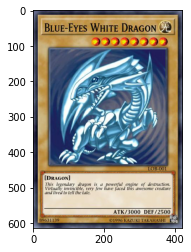

In [3]:
img = Image.open(BytesIO(page.content))
plt.imshow(img)
plt.show()

Convert image to grayscale to avoid complexity of multiple colour channels (i.e. use 2D matrix instead of 3-Tensor).

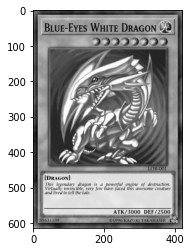

In [4]:
img_gray = img.convert("LA")
plt.imshow(img_gray)
plt.show()

Convert into numpy matrix.

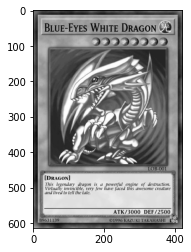

In [5]:
img_matrix = np.array(list(img_gray.getdata(band=0)), float)
img_matrix.shape = (img_gray.size[1], img_gray.size[0])
img_matrix = np.matrix(img_matrix)
plt.imshow(img_matrix, cmap="gray")
plt.show()

The image matrix has 600-ish rows and 400-ish columns (i.e. pixels). Each matrix element holds the value of how dark/light the corresponding pixel should be.

### Calculate SVD of image

$A=UDV^{T}$

- $A$ real-valued $m \times n$ matrix (does not have to be squared)
- $U$ orthogonal $m \times m$ matrix; columns are left-singular vectors of $A$
- $V$ orthogonal $n \times n$ matrix; columns are right-singular vectors of $A$ (hence $V^T$ rows are right-singular vectors of $A$)
- $D$ diagonal $m \times n$ matrix; diagonal elements are the singular values of $A$

We have from Eigendecomposition:

$A=V\Lambda V^{-1}$

- $V$ is the concatenation of all Eigenvectors of $A$ (must be squared)
- $\Lambda$ is $diag(\lambda)$ where $\lambda$ is the vector of Eigenvalues
- usually the $\lambda$'s are arranged in descending order, so that the first eigenvalue with its associated eigenvector may be primary characteristic of matrix $A$

Hence:
- Just like Eigenvalues ($\lambda$) are arranged in descending order in $diag(\lambda)=\Lambda$...
- so too are singular values $d$ arranged in descending order in $diag(d)=D$
- thus the first left-singular vector of $U$, and the first right-singular vector of $V$ could be the most prominent feature of the image (i.e. the most important aspects of the data)
- so we can use that to recosntruct the image using only that first left-singular vector of $U$ and right-singular vector of $V$

In [6]:
U, d, VT = np.linalg.svd(img_matrix)

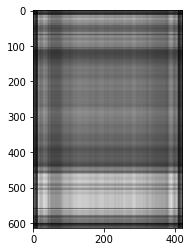

In [7]:
# grab first left-singular vector of matrix U from first column with: np.matrix(U[:, :1])
# grab first right-singular vector of matrix VT from first row with: np.matrix(VT[:1, :])
# grab first singular value from d and create a diagonal 1 element matrix out of it with: np.diag(d[:1])
reconstruct_img = np.matrix(U[:, :1]) * np.diag(d[:1]) * np.matrix(VT[:1, :])
# reconstruct_img = np.dot(np.matrix(U[:, :1]), np.dot(np.diag(d[:1]),np.matrix(VT[:1, :])))
# does the same but with np.dot() instead of *
plt.imshow(reconstruct_img, cmap="gray")
plt.show()

One set of singular vectors and a singular value do not fully reconstruct the image. But adding additional singular vectors and values will improve the image quality.

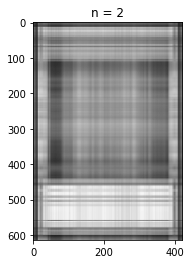

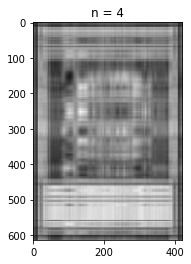

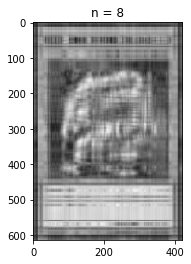

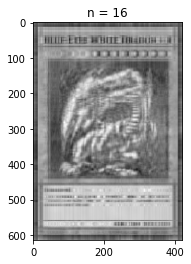

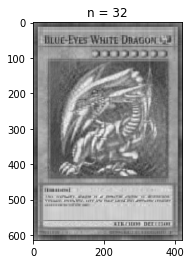

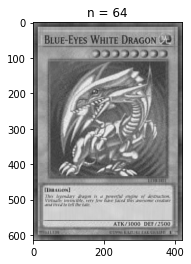

In [8]:
for i in [2, 4, 8, 16, 32, 64]:
    reconstruct_img = np.matrix(U[:, :i]) * np.diag(d[:i]) * np.matrix(VT[:i, :])
    plt.imshow(reconstruct_img, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

With 64 singular vectors and singular values the image has been reconstructed quite well, but with a much smaller datasize than the original.

In [9]:
img_matrix.shape

(614, 421)

In [10]:
full_img_size = img_matrix.shape[0] * img_matrix.shape[1]
full_img_size

258494

In [11]:
svd64_rep_img_size = 64*614 + 64 + 64*421
# 64 left singular vectors with each having 614 elements (U is m x m i.e. number of rows of A)
# 64 right singular vectors with each having 421 elements (V is n x n i.e. number of columns of A)
# 64 singular values
svd64_rep_img_size

66304

In [12]:
svd64_rep_img_size / full_img_size

0.2565011180143446

Now the reconstructed image requires 26% of the datapoints as the original.

SVD can also be used to compress any other types of media files.

SVD used to substantially reduce the inputs of ML model i.e. reduce the compute required to train a model and make the model more efficient in a production system.